In [1]:
# from utils import *
from fastai2.vision.all import *
from nbdev.showdoc import *
from ipywidgets import widgets
from pandas.api.types import CategoricalDtype

import matplotlib as mpl
# mpl.rcParams['figure.dpi']= 200
mpl.rcParams['savefig.dpi']= 200
mpl.rcParams['font.size']=12

set_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
pd.set_option('display.max_columns',999)
np.set_printoptions(linewidth=200)
torch.set_printoptions(linewidth=200)

from fastai2.vision.widgets import *

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
path = Path('../../other-chess-data/bing-search/')
fns = get_image_files(path)  # works recursively, to each subfolder

failed = verify_images(fns)

In [4]:
failed.map(Path.unlink)

(#14) [None,None,None,None,None,None,None,None,None,None...]

In [7]:
pieces = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [10]:
dls = pieces.dataloaders(path)

In [12]:
list(dls.vocab)

['bishop-chess-piece',
 'king-chess-piece',
 'knight-chess-piece',
 'pawn-chess-piece',
 'queen-chess-piece',
 'rook-chess-piece']

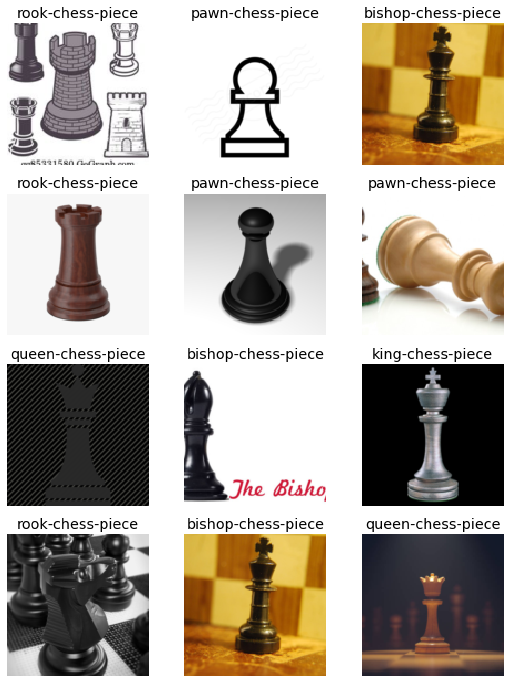

In [17]:
dls.valid.show_batch(max_n=12, nrows=4)

In [19]:
pieces = pieces.new(
    item_tfms=RandomResizedCrop(128, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = pieces.dataloaders(path)

In [20]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.542847,1.749709,0.536398,00:19


epoch,train_loss,valid_loss,error_rate,time
0,1.841125,1.488732,0.501916,00:05
1,1.577158,1.156215,0.432950,00:07
2,1.381360,1.106928,0.375479,00:06
3,1.207676,1.079388,0.363985,00:05


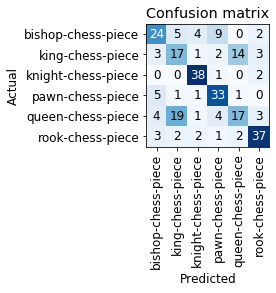

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

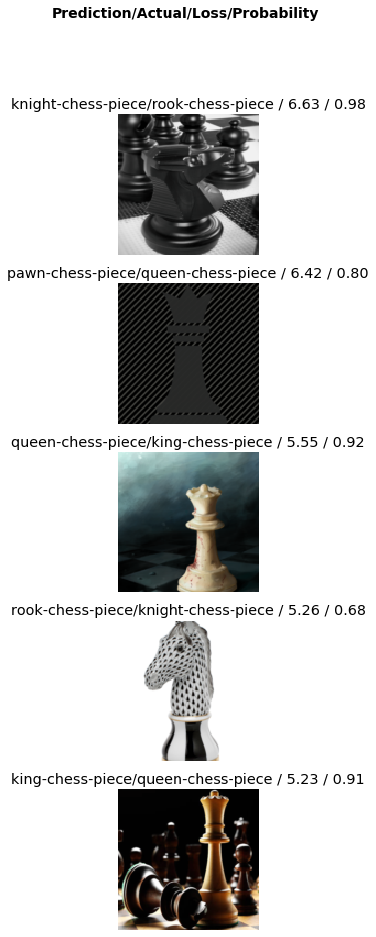

In [22]:
interp.plot_top_losses(5, nrows=5)

In [74]:
import os
from IPython.display import display
def plt_img(fn):
    pic = Image.open(fn)
    pic = pic.resize((100,100))
    display(pic)

In [79]:
# cleaner = ImageClassifierCleaner(learn)
# cleaner

In [69]:
deletes = [cleaner.fns[e] for e in cleaner.delete()]
deletes

[Path('../../other-chess-data/bing-search/bishop-chess-piece/00000129.jpg'),
 Path('../../other-chess-data/bing-search/bishop-chess-piece/00000103.jpg'),
 Path('../../other-chess-data/bing-search/bishop-chess-piece/00000127.jpg'),
 Path('../../other-chess-data/bing-search/bishop-chess-piece/00000062.JPG'),
 Path('../../other-chess-data/bing-search/bishop-chess-piece/00000069.jpg'),
 Path('../../other-chess-data/bing-search/bishop-chess-piece/00000134.png'),
 Path('../../other-chess-data/bing-search/bishop-chess-piece/00000046.jpg'),
 Path('../../other-chess-data/bing-search/bishop-chess-piece/00000136.jpg'),
 Path('../../other-chess-data/bing-search/bishop-chess-piece/00000076.jpg'),
 Path('../../other-chess-data/bing-search/bishop-chess-piece/00000095.jpg'),
 Path('../../other-chess-data/bing-search/bishop-chess-piece/00000112.jpg')]

In [72]:
#before
!ls ../../other-chess-data/bing-search/bishop-chess-piece/ | wc -l

147


In [75]:
for d in deletes:
    os.remove(d)

In [76]:
#after
!ls ../../other-chess-data/bing-search/bishop-chess-piece/ | wc -l

136


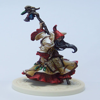

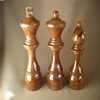

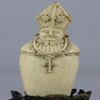

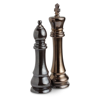

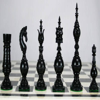

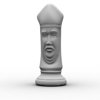

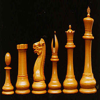

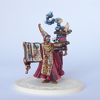

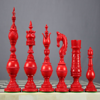

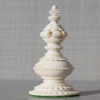

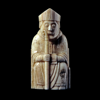

[None, None, None, None, None, None, None, None, None, None, None]

In [70]:
[plt_img(e) for e in list(deletes)]

In [42]:
!ls ~/other-chess-data/bing-search/bishop-chess-piece | wc -l

147


In [36]:
cleaner.change()

(#0) []

In [28]:
?? cleaner

In [29]:
learn.export('models/chess1.pkl')

In [31]:
!ls models

chess1.pkl
